In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc


In [2]:
data = pd.read_excel('Book5.xlsx')

In [3]:
# ورودی x
# خروجی y

X = data[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
# X = data[['phase','student_level']]
y = data['task_variant']

In [4]:
# تبدیل برچسب‌ها به مقادیر عددی
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
# نرمال‌سازی داده‌های ورودی
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
# تبدیل داده‌ها به فرمت numpy
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1, 1)

In [7]:
#تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
del model

In [9]:
#ساخت و آموزش مدل LSTM

model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.5238 - loss: 0.9485 - val_accuracy: 0.6050 - val_loss: 0.8497
Epoch 2/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.6155 - loss: 0.8149 - val_accuracy: 0.6394 - val_loss: 0.7517
Epoch 3/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6363 - loss: 0.7771 - val_accuracy: 0.6562 - val_loss: 0.7264
Epoch 4/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6462 - loss: 0.7531 - val_accuracy: 0.6425 - val_loss: 0.7698
Epoch 5/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6506 - loss: 0.7269 - val_accuracy: 0.6862 - val_loss: 0.6830
Epoch 6/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.6799 - loss: 0.6944 - val_accuracy: 0.7056 - val_loss: 0.6250
Epoch 7/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.7092 - loss: 0.6198 - val_accuracy: 0.7081 - val_loss: 0.6464
Epoch 8/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.7026 -

In [11]:
# ارزیابی مدل

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test.flatten()

accuracy = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted') 
precision = precision_score(y_test_classes, y_pred_classes, average='weighted') 
recall = recall_score(y_test_classes, y_pred_classes, average='weighted') 

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Accuracy: 98.55%
F1 Score: 98.55%
Precision: 98.55%
Recall: 98.55%

Confusion Matrix:
[[1001    6    0]
 [  16  568    3]
 [   0    4  402]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1007
           1       0.98      0.97      0.98       587
           2       0.99      0.99      0.99       406

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [12]:
# پیش‌بینی با مدل
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_classes})
print(comparison)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
      Actual  Predicted
0          0          0
1          1          1
2          0          0
3          0          0
4          0          0
...      ...        ...
1995       1          1
1996       1          1
1997       1          1
1998       0          0
1999       0          0

[2000 rows x 2 columns]


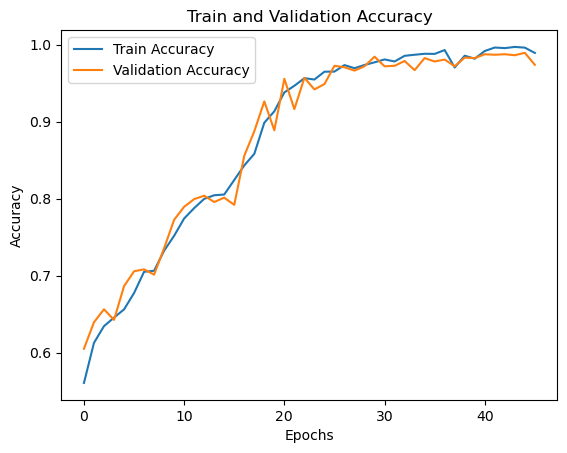

In [13]:
# تاریخچه آموزش مدل
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()

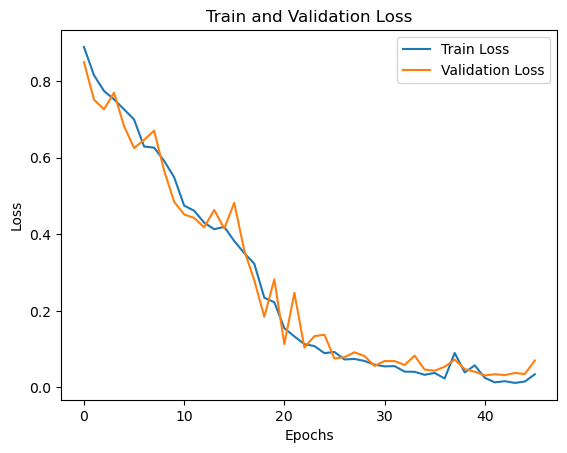

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

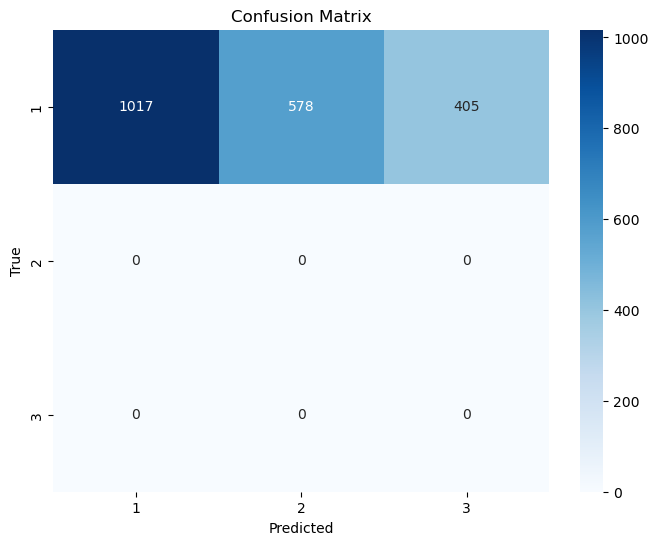

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

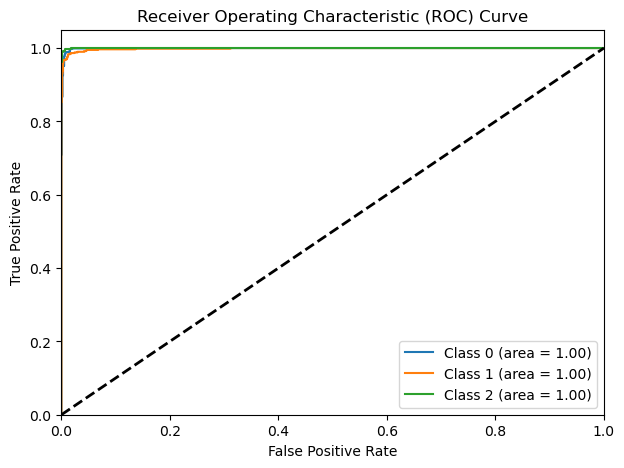

In [18]:
# رسم نمودار AUC و ROC
n_classes = 3

# محاسبه ROC و AUC برای هر کلاس
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
